In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize

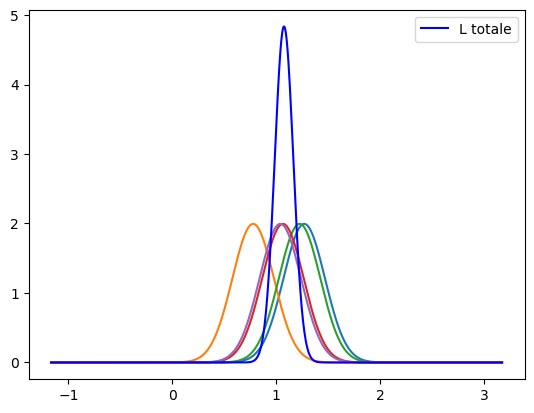

massimo della likelihood si ha in: 1.0756500622264222
MLE: 1.0755046929566157


In [10]:
sigma=0.2
mu=1
N=5

distG = scipy.stats.norm(loc=mu , scale=sigma)
fake = distG.rvs(N)  
min_fake=min(fake) 
max_fake=max(fake) 

xgrid=np.linspace(-1.5*min_fake, 2.5*max_fake, 1000)
prod=1
for x in fake:
    dist=scipy.stats.norm(loc=x , scale=sigma)
    #plot della singola likelihood
    plt.plot(xgrid, dist.pdf(xgrid))  
    
    prod=dist.pdf(xgrid)*prod  

plt.plot(xgrid, prod, color='blue', label="L totale")
plt.legend()
plt.show()

L=np.array(prod)

indici=np.argsort(L)  
indice_max=indici[-1]  

print("massimo della likelihood si ha in:", xgrid[indice_max])
print("MLE:", np.mean(fake))


In [11]:
logL=np.log(L)
deltatheta=xgrid[1]-xgrid[0]
sigma_mu=1/np.sqrt(-np.diff(logL,2)/deltatheta**2) 

sigma_fisher=sigma/np.sqrt(N)

print("sigma ottenuto da Fisher:",sigma_fisher)
print("sigma ottenuto dal grafico:",sigma_mu[indice_max]) 

sigma ottenuto da Fisher: 0.08944271909999159
sigma ottenuto dal grafico: 0.08944271909998534


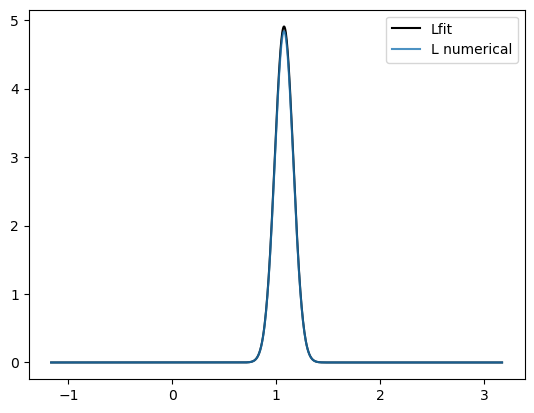

In [17]:
distG_stimata = scipy.stats.norm(loc= np.mean(fake), scale=sigma_fisher)
plt.plot(xgrid, 1.1*distG_stimata.pdf(xgrid), color='black', alpha=1, label="Lfit")  

#numerical L
plt.plot(xgrid, L, alpha=0.8, label="L numerical")   
plt.legend()
plt.show()

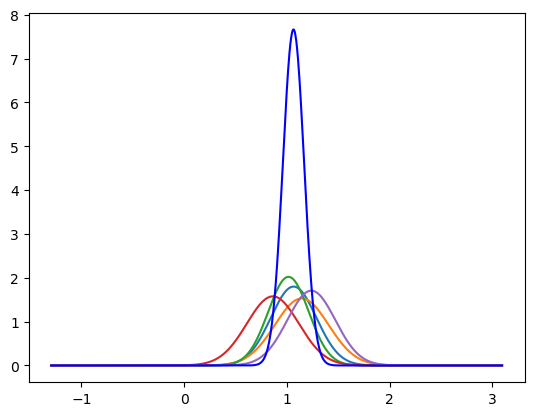

massimo della likelihood si ha in: 1.064279610834362
MLE: 1.0639068697403251


In [20]:
#SAME AS ABOVE BUT WITH HETEOSCEDASTIC ERRORS

N=5
mu=1
sigma=0.2

dists=scipy.stats.norm(loc=0.2, scale=0.05)
sigmas=dists.rvs(N)   

fake = np.concatenate([scipy.stats.norm(loc=mu , scale=s).rvs(1) for s in sigmas])

min_fake=min(fake) 
max_fake=max(fake) 

xgrid=np.linspace(-1.5*min_fake, 2.5*max_fake, 1000)
prod=1

for x,s in zip(fake,sigmas):
    dist=scipy.stats.norm(loc=x , scale=s)
    plt.plot(xgrid, dist.pdf(xgrid))  
    prod=dist.pdf(xgrid)*prod  

plt.plot(xgrid, prod, color='blue')
plt.show()

L=np.array(prod)

indici=np.argsort(L)   
indice_max=indici[-1]  

mu_stima=np.sum(fake/sigmas**2)/np.sum(1/sigmas**2)

print("massimo della likelihood si ha in:", xgrid[indice_max])
print("MLE:", mu_stima)


In [21]:
logL=np.log(L)
deltatheta=xgrid[1]-xgrid[0]
sigma_mu=1/np.sqrt(-np.diff(logL,2)/deltatheta**2)  

sigma_fisher=1/np.sqrt(np.sum(1/sigmas**2))
print("sigma ottenuto da Fisher: ",sigma_fisher)
print("sigma ottenuto dai grafici: ",sigma_mu[indice_max])


sigma ottenuto da Fisher:  0.1028262635668211
sigma ottenuto dai grafici:  0.10282626356683104


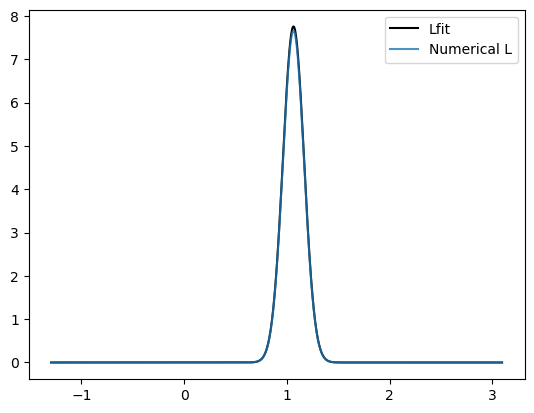

In [26]:
distG_stimata = scipy.stats.norm(loc= mu_stima, scale=sigma_fisher)
plt.plot(xgrid, 2*distG_stimata.pdf(xgrid), color='black', alpha=1, label="Lfit")
plt.plot(xgrid, prod, alpha=0.8, label="Numerical L")
plt.legend()
plt.show()